# Dask Bag

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Макрушин С.В. Лекция "Map-Reduce"
* https://docs.dask.org/en/latest/bag.html
* Jesse C. Daniel. Data Science with Python and Dask. 
* https://docs.dask.org/en/stable/generated/dask.bag.read_text.html
* https://docs.dask.org/en/stable/generated/dask.bag.Bag.distinct.html
* https://docs.dask.org/en/stable/generated/dask.bag.Bag.count.html
* https://www.nltk.org/_modules/nltk/tokenize/regexp.html
* https://docs.dask.org/en/stable/generated/dask.bag.Bag.mean.html
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* https://docs.dask.org/en/stable/generated/dask.bag.Bag.frequencies.html
* https://pypi.org/project/wordcloud/

## Задачи для совместного разбора

In [3]:
#import dask.bag as db
#import json

In [4]:
#with open("./data/posts.json") as fp:
#    posts = json.load(fp)

1. Посчитайте длину (в кол-ве символов) каждого заголовка.

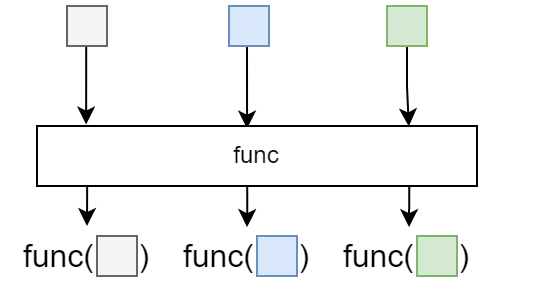

2. Выведите id постов, длина заголовков которых не более 15 символов.

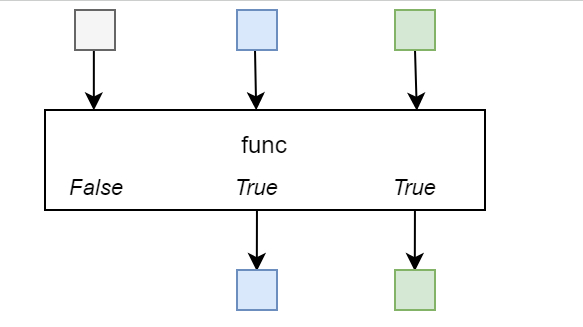

## Лабораторная работа 9

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений проводятся над `dask.bag` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.bag` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.bag` (то есть то, что было получено до вызова `compute`, а не после).

<p class="task" id="1"></p>

1\. В файлах архива `reviews_full.zip` находятся файлы, содержащие информацию об отзывах к рецептам в формате JSON Lines. Отзывы разделены на файлы в зависимости от оценки (например, в файле `reviews_1.json` находятся отзывы с оценкой 1). Считайте файлы из этого архива (предварительно разархивировав) в виде `dask.bag`. Преобразуйте текстовое содержимое файлов с помощью модуля `json`. Выведите на экран первые 5 элементов полученного `bag`.

Примечание: при необходимости вы можете разархивировать архив любым удобным способом.

In [5]:
import dask.bag as db
import json
import re

In [6]:
b = db.read_text('reviews_full/*.json').map(json.loads)
b

dask.bag<loads, npartitions=6>

In [7]:
b.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.'},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten'},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will be making this often.'},
 {'u

<p class="task" id="2"></p>

2\. Модифицируйте функцию разбора JSON таким образом, чтобы в каждый словарь c информацией об отзыве добавить ключ `rating`. Значение получите на основе названия файла (см. аргумент `include_path` функции `read_text`), использовав для этого регулярное выражение. При создании `bag` разбейте набор данных на сегменты размером 128 MiB (см. аргумент `blocksize`).  Выведите на экран первые 5 элементов полученного `bag` и количество сегментов в нем. 

In [8]:
b2 = db.read_text('reviews_full/*.json', include_path=True, blocksize="128MiB")

b2 = b2.map(
    lambda x: re.sub('}$', ', "rating": '+re.search(r'(?<=reviews_)\d', x[1]).group()+'}', x[0])
)

b2 = b2.map(json.loads)

b2

dask.bag<loads, npartitions=25>

In [9]:
b2.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

<p class="task" id="3"></p>

3\. Посчитайте, сколько различных пользователей оставляли отзывы. Выведите это количество на экран.

In [10]:
#b2.pluck('user_id').count().compute()

In [11]:
b2.pluck('user_id').distinct().count().compute()

226570

<p class="task" id="4"></p>

4\. Создайте версию `bag` из задания 2, в которой сохранены только отзывы, оставленные в 2014 и 2015 годах. Посчитайте и выведите на экран долю, которую составляют отзывы, оставленные в 2014 и 2015 году, среди всех отзывов.

In [12]:
b4 = b2.filter(
    lambda x: x['date'][:4]=='2014' or x['date'][:4]=='2015'
)
cnt_b4 = b4.count().compute()
cnt_b4

735274

In [13]:
cnt_b2 = b2.count().compute()
cnt_b2

9057540

In [14]:
ratio = (cnt_b4 / cnt_b2)
ratio

0.08117811237929945

<p class="task" id="5"></p>

5\. Для отзывов, оставленных в мае 2013 года, выполните предобработку: 
   * приведите строки к нижнему регистру;
   * обрежьте пробельные символы в начале и конце строки;
   * удалите все символы, кроме английских букв и пробелов.
   
Посчитайте и выведите на экран среднюю длину этих отзывов после предобработки. Если текстовое содержимое отзыва отсутствует, считайте, что длина отзыва равна нулю.

In [15]:
%%time
b5 = b2.filter(
    lambda x: x['date'][:7]=='2013-05'
)

b5 = b5.map(
    lambda x: re.sub(r"[^a-zA-Z\s]+", "", x['review'].strip().lower())
)

b5.map(lambda x: len(x)).mean().compute()

Wall time: 31.1 s


269.2301560494494

<p class="task" id="6"></p>

6\. В файле `food.txt` представлен список из 329 ссылок на страницы Википедии, посвященные различным блюдам. Получив основное текстовое содержимое этих страниц, выясните, какие топ-30 слов используются в этих статьях чаще всего. Выведите на экран эти слова и их частоты.

Для разбиения текста на слова воспользуйтесь токенизатором `tokenizer`. В качестве препроцессинга приведите все слова к нижнему регистру и удалите стоп-слова, входящие в список английских стоп-слов из `nltk`.

При решении задачи не используйте параллельных вычислений. Измерьте время выполнения решения.

Примечание: под основным содержимым страницы подразумевается содержимое тега `div`, имеющего класс `mw-parser-output`.

In [16]:
from bs4 import BeautifulSoup

In [17]:
from urllib.request import urlopen

In [18]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer

In [19]:
from nltk.corpus import stopwords

In [20]:
%%time
f = open('food.txt')
urls = f.readlines()

nltk_words = list(stopwords.words('english')) 

d = dict()
for url in urls:
    page = urlopen(url)
    soup = BeautifulSoup(page.read())
    string = soup.find("div", class_="mw-parser-output").get_text().lower()
    
    list_of_words2 = RegexpTokenizer(r'[a-zA-Z]+').tokenize(string)

    output2 = [w for w in list_of_words2 if not w in nltk_words]
    
    for word in output2:
        d[word] = d.get(word,0) + 1
        
sorted(d.items(), key=lambda x: x[1], reverse=True)[:30]

Wall time: 3min 7s


[('nasi', 8519),
 ('goreng', 4647),
 ('ayam', 4490),
 ('sate', 3414),
 ('mi', 3262),
 ('pizza', 2766),
 ('soto', 2761),
 ('roti', 2512),
 ('indonesian', 2494),
 ('rice', 2479),
 ('edit', 1987),
 ('food', 1862),
 ('es', 1720),
 ('ikan', 1708),
 ('kari', 1708),
 ('retrieved', 1697),
 ('babi', 1671),
 ('b', 1586),
 ('tahu', 1586),
 ('cheese', 1551),
 ('rujak', 1528),
 ('bubur', 1420),
 ('teh', 1358),
 ('soup', 1338),
 ('sayur', 1327),
 ('dishes', 1318),
 ('bakar', 1270),
 ('sambal', 1245),
 ('list', 1244),
 ('lumpia', 1228)]

In [35]:
#sorted(d.items(), key=lambda x: x[1], reverse=True)[:30]

<p class="task" id="7"></p>

7\. Решите задачу 6, распараллелив процесс получения текста страницы из Википедии при помощи `dask.bag`.Выведите на экран полученный список топ-30 слов и их частоты. Для подсчета частот воспользуйтесь методом `Bag.frequencies`. Измерьте время выполнения решения.

Подсказка: обратите внимание на количество сегментов в `Bag`, который вы создали. 

In [31]:
def get_words(url):
    page = urlopen(url)
    soup = BeautifulSoup(page.read())
    string = soup.find("div", class_="mw-parser-output").get_text().lower()
    
    list_of_words2 = RegexpTokenizer(r'[a-zA-Z]+').tokenize(string)
    
    output2 = [w for w in list_of_words2 if not w in nltk_words]
    
    return output2

In [32]:
%%time
urls_bag = db.from_sequence(urls)
urls_bag = urls_bag.map(get_words)
d7 = urls_bag.flatten().frequencies().compute()
sorted(d7, key=lambda x: x[1], reverse=True)[:30]

Wall time: 1min 34s


[('nasi', 8519),
 ('goreng', 4647),
 ('ayam', 4490),
 ('sate', 3414),
 ('mi', 3262),
 ('pizza', 2766),
 ('soto', 2761),
 ('roti', 2512),
 ('indonesian', 2494),
 ('rice', 2479),
 ('edit', 1987),
 ('food', 1862),
 ('es', 1720),
 ('ikan', 1708),
 ('kari', 1708),
 ('retrieved', 1697),
 ('babi', 1671),
 ('b', 1586),
 ('tahu', 1586),
 ('cheese', 1551),
 ('rujak', 1528),
 ('bubur', 1420),
 ('teh', 1358),
 ('soup', 1338),
 ('sayur', 1327),
 ('dishes', 1318),
 ('bakar', 1270),
 ('sambal', 1245),
 ('list', 1244),
 ('lumpia', 1228)]

In [34]:
#sorted(d7, key=lambda x: x[1], reverse=True)[:30]

**это решение в 2 раза быстрее**

<p class="task" id="8"></p>

8\. Визуализируйте результат, полученный в задаче 6 или 7, в виде облака слов. Для генерации облака слов вы можете воспользоваться пакетом [wordcloud](https://pypi.org/project/wordcloud/). Обратите внимание, что размер слова на визуализации должен зависеть от частоты использования этого слова.

In [36]:
#pip install wordcloud

In [37]:
import wordcloud
import matplotlib.pyplot as plt

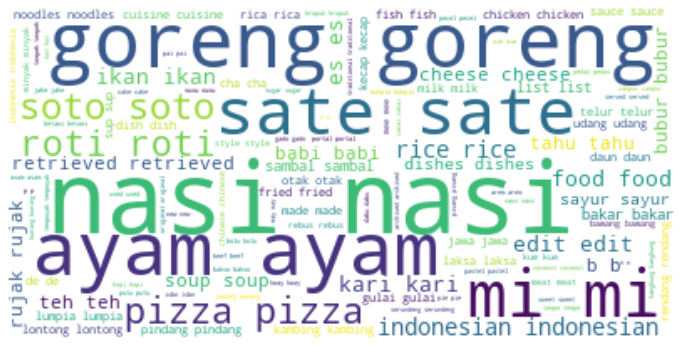

In [41]:
# облако всех слов (решение из 6 задания)
text_d = ' '.join(list(map(lambda x: (x[0]+' ')*x[1], d.items()))).strip()
wc = wordcloud.WordCloud(background_color="white").generate(text_d)

plt.figure(figsize=(12,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

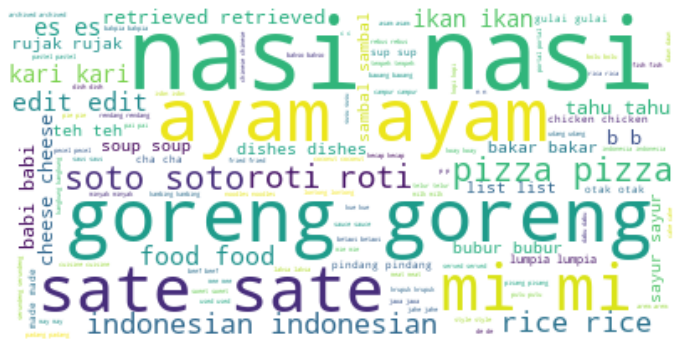

In [42]:
# облако всех слов (решение из 7 задания)
text_d7 = ' '.join(list(map(lambda x: (x[0]+' ')*x[1], d7))).strip()
wc = wordcloud.WordCloud(background_color="white").generate(text_d7)

plt.figure(figsize=(12,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

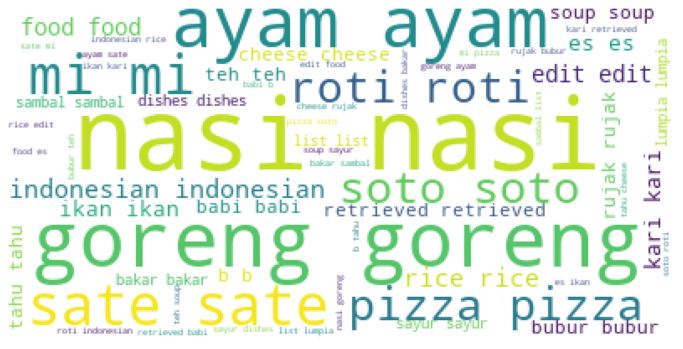

In [45]:
# облако топ-30 слов (решение из 7 задания)
d_sorted = sorted(d.items(), key=lambda x: x[1], reverse=True)[:30]

text_d = ' '.join(list(map(lambda x: (x[0]+' ')*x[1], d_sorted))).strip()
wc = wordcloud.WordCloud(background_color="white").generate(text_d)

plt.figure(figsize=(12,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

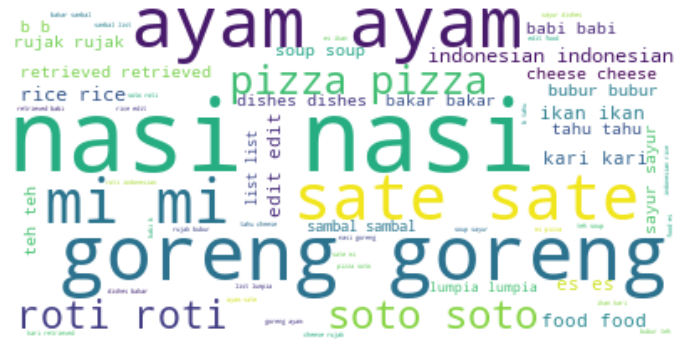

In [46]:
# облако топ-30 слов (решение из 7 задания)
d7_sorted = sorted(d7, key=lambda x: x[1], reverse=True)[:30]

text_d7 = ' '.join(list(map(lambda x: (x[0]+' ')*x[1], d7_sorted))).strip()
wc = wordcloud.WordCloud(background_color="white").generate(text_d7)

plt.figure(figsize=(12,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()